In [1]:
import os
import librosa as lb
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
import statistics
from statistics import mode
import speech_recognition as sr
import multiprocessing as mp
from multiprocessing import Process,Queue


In [2]:
directory='recordings2'

mfccarray=[]
for filename in os.listdir(directory):
    audio_file=directory+'/'+filename
    x,fs = lb.load(audio_file,sr=20000)
    #print(1)
    #Extracting MFCCs
    mfccs=librosa.feature.mfcc(x,n_mfcc=13,sr=fs,hop_length=int(0.010*fs),n_fft=int(0.02*fs))
    delta_mfcc=librosa.feature.delta(mfccs)
    delta2_mfcc=librosa.feature.delta(mfccs,order=2)
    comprehensive_mfcc=np.concatenate((mfccs,delta_mfcc,delta2_mfcc))
    mfccarray.append(comprehensive_mfcc.T)
    

    
    
    

In [3]:
print(len(mfccarray))

500


In [4]:
array_y=[]
for i in range(10):
    a=[i]*50
    array_y=array_y+a
print(len(array_y))

500


In [5]:
print(mfccarray[1].shape)

(60, 39)


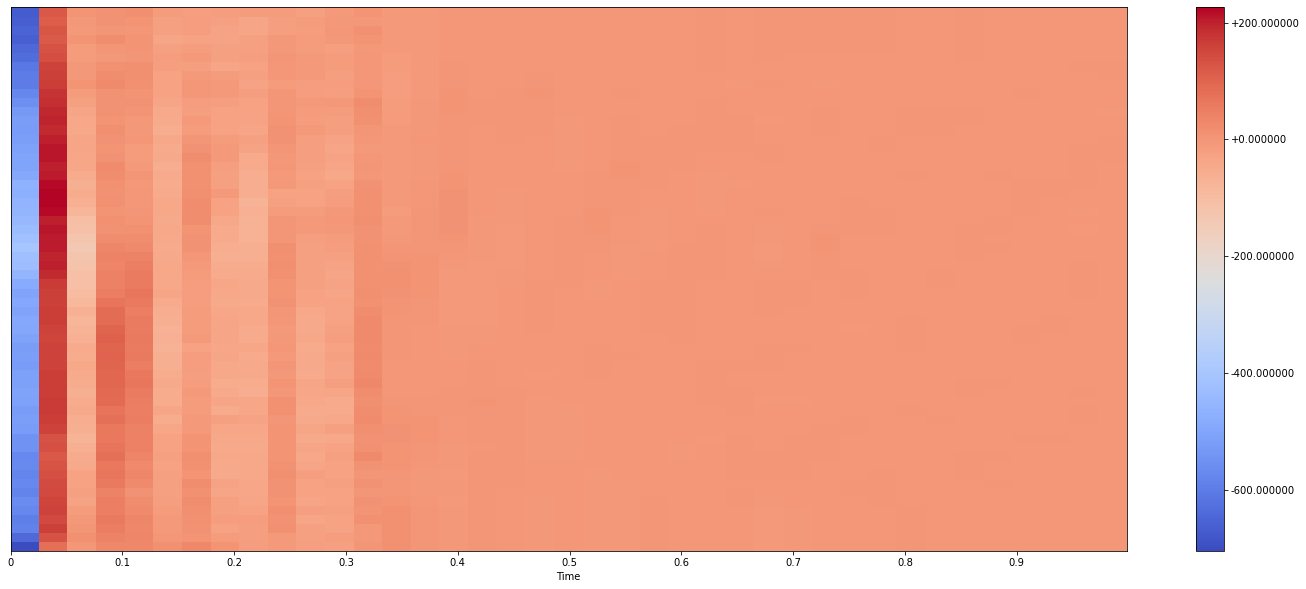

In [6]:
#MFCC plot of a frame
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccarray[1],x_axis="time",sr=fs)
plt.colorbar(format="%+2f")
plt.show()


In [7]:
# Function to calculate Dynamic time warping distance

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def distance(x,y):

    d, path = fastdtw(x,y, dist=euclidean)
    return d

#print(distance)
#print(path)

In [8]:
#Splitting tran and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mfccarray,array_y,test_size=0.3,random_state=5)

In [17]:
# Algorithm for KNN
def knn(k,digit):
    dict_index={}
    ind_list=list(range(350))
    #DTW_list=proc(digit)
    DTW_list=[]
    for i in xtrain:
        DTW_list.append(distance(digit,i))
    #print(1)    
    for i in range(len(ind_list)):
        dict_index[DTW_list[i]]=ind_list[i]
    key_list=list(dict_index.keys())
    key_list.sort()
    k_key_list=key_list[0:k]
    y_index=[]
    for i in k_key_list:
        y_index.append(dict_index[i])
    y_list=[]
    for i in y_index:
        y_list.append(ytrain[i])
    digit_utter=mode(y_list)
    return digit_utter
    
    
    
        
    

In [18]:
#Main program
def system_design():
    r=sr.Recognizer()
    mic1=sr.Microphone(device_index=1)
    with mic1 as source:
        print("speak a digit")
        r.adjust_for_ambient_noise(source)
        a=r.listen(source,timeout=None)
        print("processing")
    
        with open('speech.wav','wb') as f:
            f.write(a.get_wav_data())
    
    audio_input='speech.wav'
    xi,fsi=lb.load(audio_input,sr=20000)
    mfccsi=librosa.feature.mfcc(xi,n_mfcc=13,sr=fsi,hop_length=int(0.010*fsi),n_fft=int(0.02*fsi))
    delta_mfcci=librosa.feature.delta(mfccsi)
    delta2_mfcci=librosa.feature.delta(mfccsi,order=2)
    comprehensive_mfcci=np.concatenate((mfccsi,delta_mfcci,delta2_mfcci))
    comp_input=comprehensive_mfcci.T
    os.remove("speech.wav")
    #print(1)
    dig=knn(1,comp_input)


    if dig==0:
        print("The digit uttered is zero 0")
    elif dig==1:
        print("The digit uttered is one 1")
    elif dig==2:
        print("The digit uttered is two 2")
    elif dig==3:
        print("The digit uttered is three 3")
    elif dig==4:
        print("The digit uttered is four 4")
    elif dig==5:
        print("The digit uttered is five 5")
    elif dig==6:
        print("The digit uttered is six 6")
    elif dig==7:
        print("The digit uttered is seven 7")
    elif dig==8:
        print("The digit uttered is eight 8")
    elif dig==9:
        print("The digit uttered is nine 9")


In [13]:

# System design project
#system_design()

In [ ]:
import tkinter
from tkinter import *
root=Tk()
myButton=Button(root,text="Click me and speak",command=system_design)
myButton.pack()

root.mainloop()

speak a digit
processing
